In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
from landlab.plot.imshow import imshow_grid
from landlab.grid import RasterModelGrid
from osgeo import gdal
import xarray as xr
import pickle

In [111]:
##AZUCAR
#load netcdf data
az_prec_raw = Dataset('src/Azucar_TraCE21ka_prec.nc')
az_rad_raw  = Dataset('src/Azucar_TraCE21ka_rad.nc')
az_temp_raw = Dataset('src/Azucar_TraCE21ka_temp.nc')
#convert to np.array
az_prec_raw = np.array(az_prec_raw['prec'][:])
az_rad_raw  = np.array(az_rad_raw['rad'][:])
az_temp_raw = np.array(az_temp_raw['temp'][:])
#convert dimensions
az_prec = [p * 10 for p in az_prec_raw[0]]
az_rad  = [r for r in az_rad_raw[0]]
az_temp = [t - 273.15 for t in az_temp_raw[0]]
#create dataframes (for moving window plots)
az_prec_pd = pd.DataFrame(az_prec)
az_rad_pd  = pd.DataFrame(az_rad)
az_temp_pd = pd.DataFrame(az_temp)

##SANTA GRACIA
#load netcdf data
sg_prec_raw = Dataset('src/SantaGracia_TraCE21ka_prec.nc')
sg_rad_raw  = Dataset('src/SantaGracia_TraCE21ka_rad.nc')
sg_temp_raw = Dataset('src/SantaGracia_TraCE21ka_temp.nc')
#convert to np.array
sg_prec_raw = np.array(sg_prec_raw['prec'][:])
sg_rad_raw  = np.array(sg_rad_raw['rad'][:])
sg_temp_raw = np.array(sg_temp_raw['temp'][:])
#convert dimensions
sg_prec = [p * 10 for p in sg_prec_raw[0]]
sg_rad  = [r for r in sg_rad_raw[0]]
sg_temp = [t - 273.15 for t in sg_temp_raw[0]]
#create dataframes (for moving window plots)
sg_prec_pd = pd.DataFrame(sg_prec)
sg_rad_pd  = pd.DataFrame(sg_rad)
sg_temp_pd = pd.DataFrame(sg_temp)

##LA CAMPANA
#load netcdf data
lc_prec_raw = Dataset('src/LaCampana_TraCE21ka_prec.nc')
lc_rad_raw  = Dataset('src/LaCampana_TraCE21ka_rad.nc')
lc_temp_raw = Dataset('src/LaCampana_TraCE21ka_temp.nc')
#convert to np.array
lc_prec_raw = np.array(lc_prec_raw['prec'][:])
lc_rad_raw  = np.array(lc_rad_raw['rad'][:])
lc_temp_raw = np.array(lc_temp_raw['temp'][:])
#convert dimensions
lc_prec = [p * 10 for p in lc_prec_raw[0]]
lc_rad  = [r for r in lc_rad_raw[0]]
lc_temp = [t - 273.15 for t in lc_temp_raw[0]]
#create dataframes (for moving window plots)
lc_prec_pd = pd.DataFrame(lc_prec)
lc_rad_pd  = pd.DataFrame(lc_rad)
lc_temp_pd = pd.DataFrame(lc_temp)

#NAHUELBUTA
#load netcdf data
na_prec_raw = Dataset('src/Nahuelbuta_TraCE21ka_prec.nc')
na_rad_raw  = Dataset('src/Nahuelbuta_TraCE21ka_rad.nc')
na_temp_raw = Dataset('src/Nahuelbuta_TraCE21ka_temp.nc')
#convert to np.array
na_prec_raw = np.array(na_prec_raw['prec'][:])
na_rad_raw  = np.array(na_rad_raw['rad'][:])
na_temp_raw = np.array(na_temp_raw['temp'][:])
#convert dimensions
na_prec = [p * 10 for p in na_prec_raw[0]]
na_rad  = [r for r in na_rad_raw[0]]
na_temp = [t - 273.15 for t in na_temp_raw[0]]
#create dataframes (for moving window plots)
na_prec_pd = pd.DataFrame(na_prec)
na_rad_pd  = pd.DataFrame(na_rad)
na_temp_pd = pd.DataFrame(na_temp)

In [112]:
## Create Rolling averages
#AZUCAR
az_prec_rolling = az_prec_pd.rolling(100, center = True).mean()
az_rad_rolling  = az_rad_pd.rolling(100, center = True).mean()
az_temp_rolling = az_temp_pd.rolling(100, center = True).mean()

#SANTA GRACIA
sg_prec_rolling = sg_prec_pd.rolling(100, center = True).mean()
sg_rad_rolling  = sg_rad_pd.rolling(100, center = True).mean()
sg_temp_rolling = sg_temp_pd.rolling(100, center = True).mean()

#LA CAMPANA
lc_prec_rolling = lc_prec_pd.rolling(100, center = True).mean()
lc_rad_rolling  = lc_rad_pd.rolling(100, center = True).mean()
lc_temp_rolling = lc_temp_pd.rolling(100, center = True).mean()

#NAHUELBUTA
na_prec_rolling = na_prec_pd.rolling(100, center = True).mean()
na_rad_rolling  = na_rad_pd.rolling(100, center = True).mean()
na_temp_rolling = na_temp_pd.rolling(100, center = True).mean()

In [134]:
ticks = [10000, 80000, 160000, 230000, 260000]
labels = ['21ka BP', '16ka BP', '8ka BP', '2ka BP', 'PD']

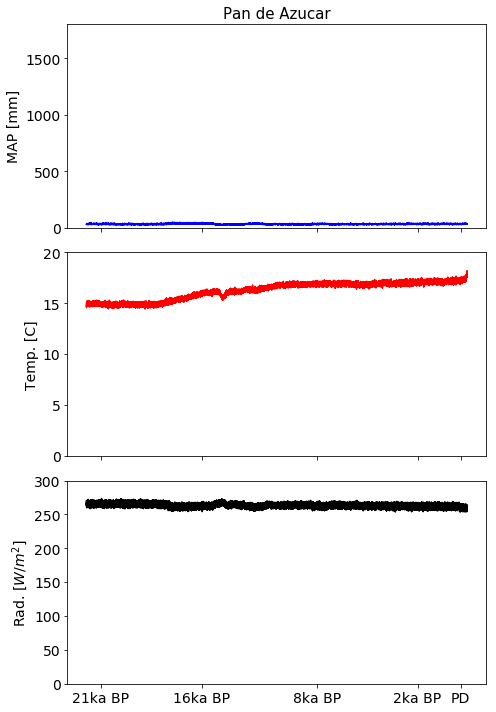

In [140]:

fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(az_prec_rolling , 'b')
ax[1].plot(az_temp_rolling, 'r')
ax[2].plot(az_rad_rolling, 'k')

#labeling
ax[0].set_title('Pan de Azucar', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)

#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)
    
plt.xticks(ticks, labels)
    
plt.tight_layout()
plt.savefig('azucar_tracedata.png', dpi = 420)

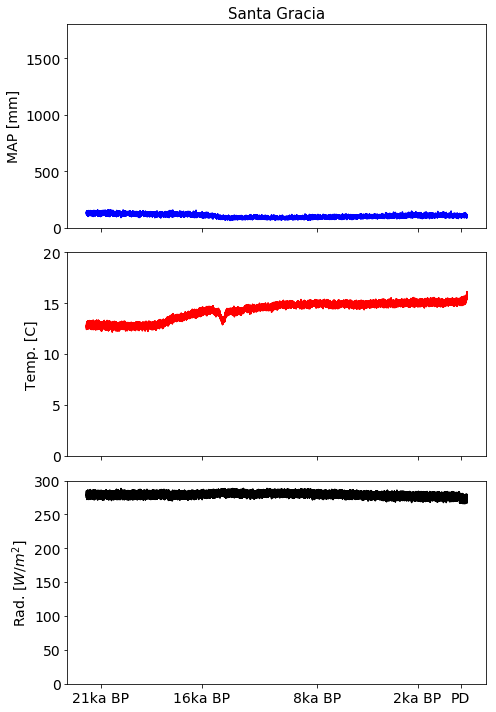

In [141]:
fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(sg_prec_rolling , 'b')
ax[1].plot(sg_temp_rolling, 'r')
ax[2].plot(sg_rad_rolling, 'k')

#labeling
ax[0].set_title('Santa Gracia', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)


#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)
 
plt.xticks(ticks, labels)
plt.tight_layout()
plt.savefig('santa_gracia_tracedata.png', dpi = 420)


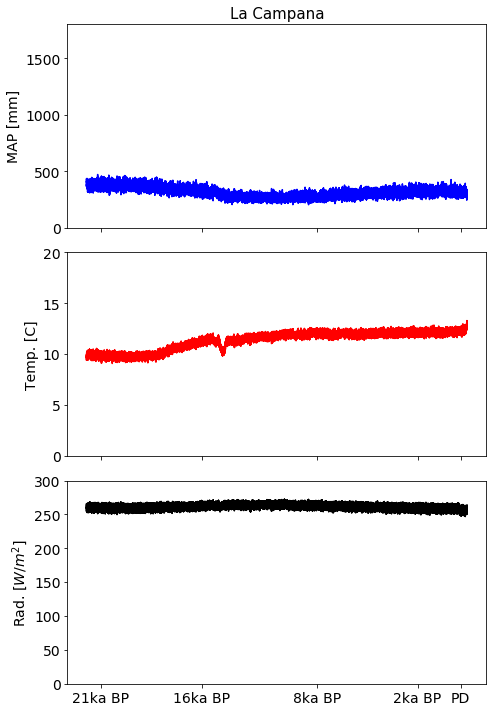

In [142]:
fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(lc_prec_rolling , 'b')
ax[1].plot(lc_temp_rolling, 'r')
ax[2].plot(lc_rad_rolling, 'k')

#labeling
ax[0].set_title('La Campana', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)


#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)

plt.xticks(ticks, labels)
plt.tight_layout()
plt.savefig('la_campana_tracedata.png', dpi = 420)


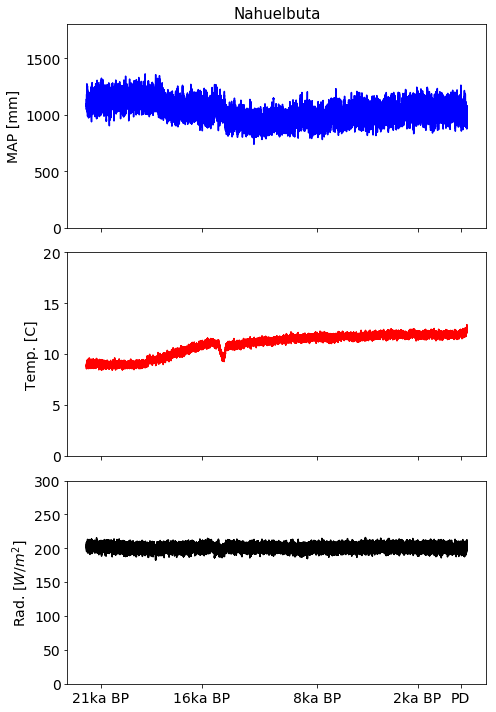

In [143]:
fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(na_prec_rolling , 'b')
ax[1].plot(na_temp_rolling, 'r')
ax[2].plot(na_rad_rolling, 'k')

#labeling
ax[0].set_title('Nahuelbuta', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)


#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)
 
plt.xticks(ticks, labels)
plt.tight_layout()
plt.savefig('nahuelbuta_tracedata.png', dpi = 420)
